In [4]:
import numpy as np
import pandas as pd 
import pickle
import warnings
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

%matplotlib inline
warnings.filterwarnings("ignore")

Using TensorFlow backend.


Found 22424 images belonging to 10 classes.


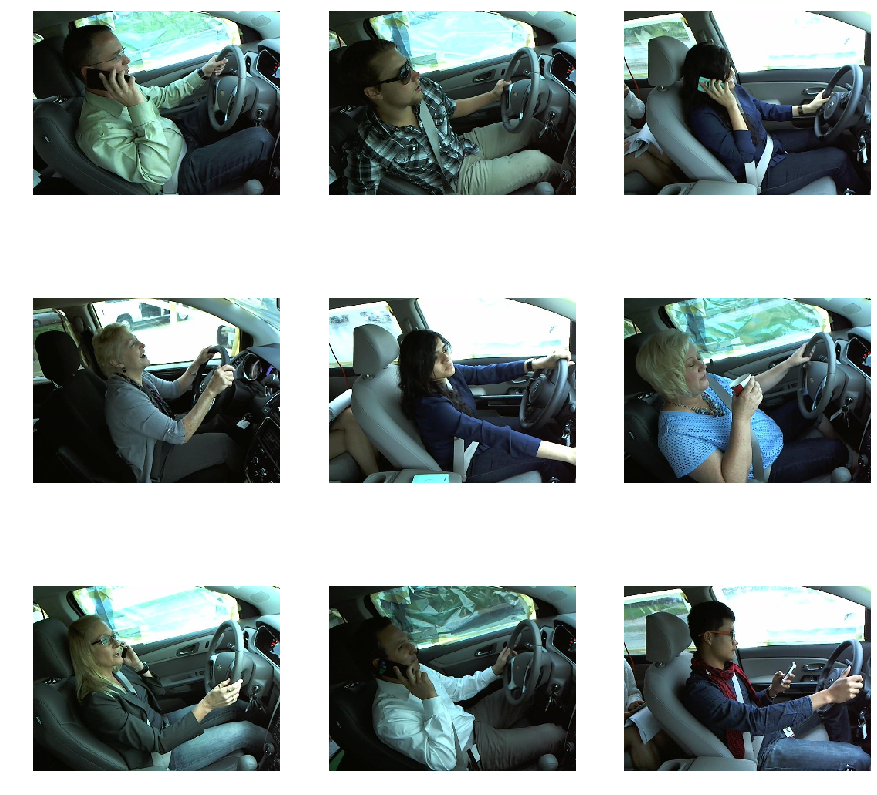

In [5]:
original_data = ImageDataGenerator(rescale=1./255)
img_data = original_data.flow_from_directory(
        'train',
        target_size=(240, 320),
        batch_size=128,
        shuffle = True,
        class_mode='categorical')
#A sample of the original images in the data set (rescaled)
for X_train, y_train in img_data:
  plt.figure(figsize=(15,15))
  plt.axis('off')
  for i in range(1, 10):
        plt.subplot(3,3,i)
        plt.imshow(X_train[i])
        plt.axis('off')
  plt.show()
  break

In [0]:
#Training set - Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        brightness_range=[0.5, 1.5],
        horizontal_flip=True,
        validation_split=0.2) # 80% - 20% train test split

test_datagen = ImageDataGenerator(rescale=1./255)

Found 17943 images belonging to 10 classes.


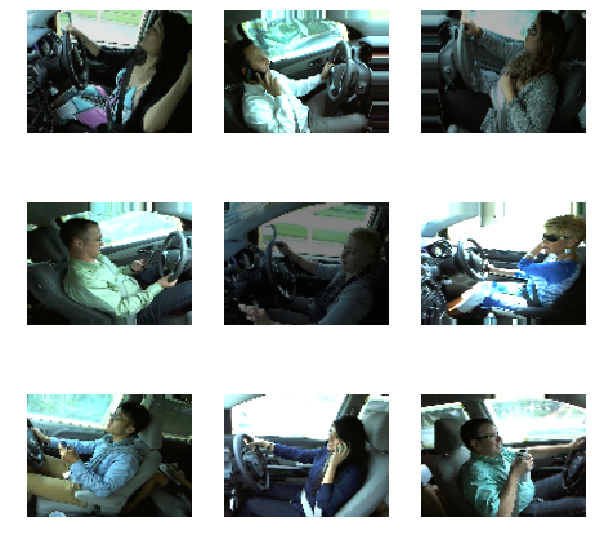

In [7]:
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(96,128),
        batch_size=32,
        shuffle = True,
        class_mode='categorical',
        subset='training')
for X_train, y_train in train_generator:
  #display a sample of images to illustrate augmentation
  plt.figure(figsize=(10,10))
  plt.axis('off')
  for i in range(1, 10):
      plt.subplot(3,3,i)
      plt.imshow(X_train[i])
      plt.axis('off')
  plt.show()
  break



In [8]:
validation_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(96,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data


Found 4481 images belonging to 10 classes.


In [0]:
model = Sequential()
#add layers
model.add(Conv2D(256, (3,3), activation='relu', input_shape=(96,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(1024, input_dim=1, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 126, 256)      7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 63, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 61, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 28, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8960)             

In [0]:
#compile the keras model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE=validation_generator.n//validation_generator.batch_size

In [12]:
#fit the model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEP_SIZE_TRAIN,
        epochs=35,
        validation_data=validation_generator,
        validation_steps=STEP_SIZE)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/35
560/560 [==============================] - 184s 329ms/step - loss: 1.8228 - acc: 0.3310 - val_loss: 1.2969 - val_acc: 0.5277
Epoch 2/35
560/560 [==============================] - 179s 320ms/step - loss: 1.0190 - acc: 0.6485 - val_loss: 0.7993 - val_acc: 0.7269
Epoch 3/35
560/560 [==============================] - 179s 319ms/step - loss: 0.6664 - acc: 0.7726 - val_loss: 0.5730 - val_acc: 0.8042
Epoch 4/35
560/560 [==============================] - 178s 318ms/step - loss: 0.5025 - acc: 0.8355 - val_loss: 0.4717 - val_acc: 0.8445
Epoch 5/35
560/560 [==============================] - 179s 319ms/step - loss: 0.4193 - acc: 0.8654 - val_loss: 0.3611 - val_acc: 0.8840
Epoch 6/35
560/560 [==============================] - 179s 319ms/step - loss: 0.3498 - acc: 0.8871 - val_loss: 0.3237 - val_acc: 0.8964
Epoch 7/35
560/560 [==============================] - 178s 318ms/step - loss: 0.3064 - ac

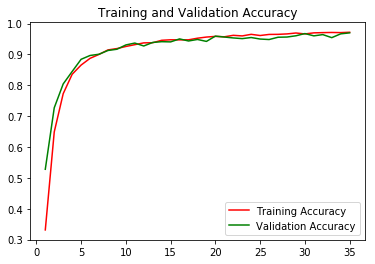

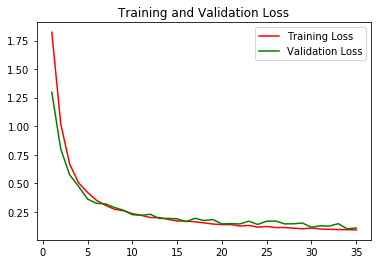

In [13]:
#plot the training and validation accuracy and loss
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.title('Training and Validation Accuracy')
plt.plot(epochs, accuracy, 'red', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'green', label='Validation Accuracy')
plt.legend()

plt.figure()
plt.title('Training and Validation Loss')
plt.plot(epochs, loss, 'red', label='Training Loss')
plt.plot(epochs, val_loss, 'green', label='Validation Loss')
plt.legend()
plt.show()

In [0]:
#create a dictionary to convert class numbers to class labels
class_dict = {0:'safe driving', 1:'texting - right',2: 'talking on the phone - right', 3: 'texting - left', 4: 'talking on the phone - left', 
              5: 'operating the radio', 6: 'drinking', 7: 'reaching behind', 8: 'hair and makeup', 9: 'talking to passenger'}

In [15]:
#generator just to rescale test images
test_datagen = ImageDataGenerator(rescale=1./255)

#get images from directory and resize
test_generator = test_datagen.flow_from_directory(
        'TestImg',
        target_size=(96,128),
        shuffle = False,
        class_mode=None,
        batch_size=1)

#get predictions on test images
labels = []
predict = model.predict_generator(test_generator,steps = 42)

#convert prediction probabilities to class labels
y_class = predict.argmax(axis=1)
for idx in y_class:
    labels.append(class_dict[idx])
    
#get image file names    
img_name = test_generator.filenames

#convert yo pandas dataframe and export results (file names and labels) to CSV file
pred_df = pd.DataFrame({'Filename': img_name,'Prediction': labels})
pred_df.to_csv('results.csv')

Found 42 images belonging to 1 classes.


In [0]:
#save the model as a pickle file
pickle.dump(model, open('model.pkl','wb'))